## Contoh Asas Pandas

Notebook ini akan membimbing anda melalui beberapa konsep asas Pandas. Kita akan mulakan dengan mengimport perpustakaan sains data yang biasa digunakan:


In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Siri

Siri adalah seperti senarai atau array 1D, tetapi dengan indeks. Semua operasi diselaraskan dengan indeks.


In [37]:
a = pd.Series(range(1,10))
b = pd.Series(["I","like","to","use","Python","and","Pandas","very","much"],index=range(0,9))
print(a,b)

0    1
1    2
2    3
3    4
4    5
5    6
6    7
7    8
8    9
dtype: int64 0         I
1      like
2        to
3       use
4    Python
5       and
6    Pandas
7      very
8      much
dtype: object


Salah satu kegunaan biasa bagi siri ialah **siri masa**. Dalam siri masa, indeks mempunyai struktur khas - biasanya julat tarikh atau tarikh dan masa. Kita boleh mencipta indeks seperti itu dengan `pd.date_range`.

Katakan kita mempunyai siri yang menunjukkan jumlah produk yang dibeli setiap hari, dan kita tahu bahawa setiap hari Ahad kita juga perlu mengambil satu item untuk diri kita sendiri. Berikut adalah cara untuk memodelkannya menggunakan siri:


Length of index is 366


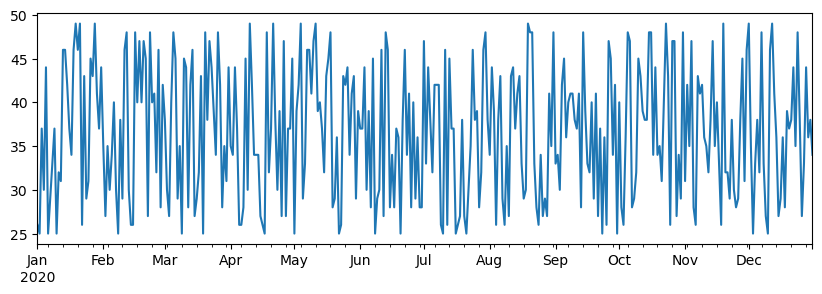

In [38]:
start_date = "Jan 1, 2020"
end_date = "Dec 31, 2020"
idx = pd.date_range(start_date,end_date)
print(f"Length of index is {len(idx)}")
items_sold = pd.Series(np.random.randint(25,50,size=len(idx)),index=idx)
items_sold.plot(figsize=(10,3))
plt.show()

In [39]:
additional_items = pd.Series(10,index=pd.date_range(start_date,end_date,freq="W"))
print(f"Additional items (10 item each week):\n{additional_items}")
total_items = items_sold+additional_items
print(f"Total items (sum of two series):\n{total_items}")

Additional items (10 item each week):
2020-01-05    10
2020-01-12    10
2020-01-19    10
2020-01-26    10
2020-02-02    10
2020-02-09    10
2020-02-16    10
2020-02-23    10
2020-03-01    10
2020-03-08    10
2020-03-15    10
2020-03-22    10
2020-03-29    10
2020-04-05    10
2020-04-12    10
2020-04-19    10
2020-04-26    10
2020-05-03    10
2020-05-10    10
2020-05-17    10
2020-05-24    10
2020-05-31    10
2020-06-07    10
2020-06-14    10
2020-06-21    10
2020-06-28    10
2020-07-05    10
2020-07-12    10
2020-07-19    10
2020-07-26    10
2020-08-02    10
2020-08-09    10
2020-08-16    10
2020-08-23    10
2020-08-30    10
2020-09-06    10
2020-09-13    10
2020-09-20    10
2020-09-27    10
2020-10-04    10
2020-10-11    10
2020-10-18    10
2020-10-25    10
2020-11-01    10
2020-11-08    10
2020-11-15    10
2020-11-22    10
2020-11-29    10
2020-12-06    10
2020-12-13    10
2020-12-20    10
2020-12-27    10
Freq: W-SUN, dtype: int64
Total items (sum of two series):
2020-01-01     NaN


Seperti yang anda lihat, kami menghadapi masalah di sini, kerana dalam siri mingguan hari-hari yang tidak disebut dianggap hilang (`NaN`), dan menambah `NaN` kepada nombor memberikan kami `NaN`. Untuk mendapatkan hasil yang betul, kita perlu menentukan `fill_value` semasa menambah siri:


2020-01-01    26.0
2020-01-02    25.0
2020-01-03    37.0
2020-01-04    30.0
2020-01-05    54.0
              ... 
2020-12-27    43.0
2020-12-28    44.0
2020-12-29    36.0
2020-12-30    38.0
2020-12-31    34.0
Length: 366, dtype: float64


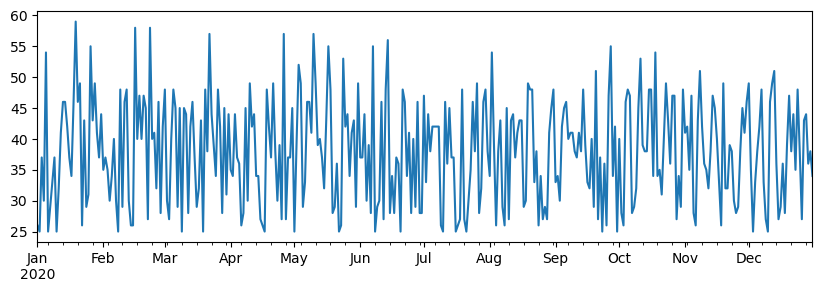

In [40]:
total_items = items_sold.add(additional_items,fill_value=0)
print(total_items)
total_items.plot(figsize=(10,3))
plt.show()

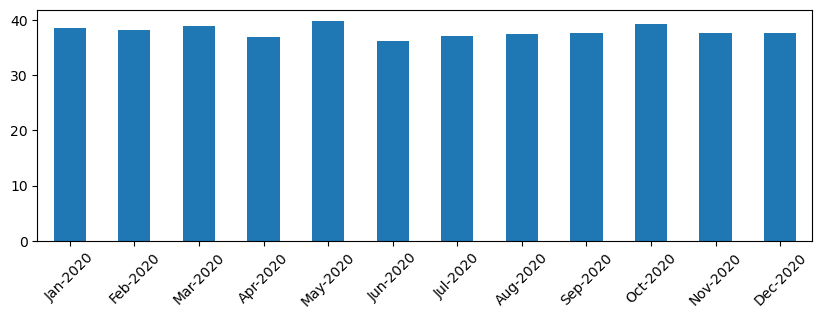

In [41]:
monthly = total_items.resample("1M").mean()
ax = monthly.plot(kind='bar',figsize=(10,3))
ax.set_xticklabels([x.strftime("%b-%Y") for x in monthly.index], rotation=45)
plt.show()

## DataFrame

Dataframe pada dasarnya adalah koleksi siri dengan indeks yang sama. Kita boleh menggabungkan beberapa siri bersama menjadi sebuah dataframe. Diberikan siri `a` dan `b` yang telah ditakrifkan di atas:


In [42]:
df = pd.DataFrame([a,b])
df

0     1   2    3       4    5       6     7     8
0  1     2   3    4       5    6       7     8     9
1  I  like  to  use  Python  and  Pandas  very  much

Kita juga boleh menggunakan Siri sebagai lajur, dan menentukan nama lajur menggunakan kamus:


In [43]:
df = pd.DataFrame({ 'A' : a, 'B' : b })
df

A       B
0  1       I
1  2    like
2  3      to
3  4     use
4  5  Python
5  6     and
6  7  Pandas
7  8    very
8  9    much

Hasil yang sama boleh dicapai dengan menukar kedudukan (dan kemudian menamakan semula lajur, untuk sepadan dengan contoh sebelumnya):


In [44]:
pd.DataFrame([a,b]).T.rename(columns={ 0 : 'A', 1 : 'B' })

A       B
0  1       I
1  2    like
2  3      to
3  4     use
4  5  Python
5  6     and
6  7  Pandas
7  8    very
8  9    much

**Memilih lajur** daripada DataFrame boleh dilakukan seperti ini:


In [45]:
print(f"Column A (series):\n{df['A']}")
print(f"Columns B and A (DataFrame):\n{df[['B','A']]}")

Column A (series):
0    1
1    2
2    3
3    4
4    5
5    6
6    7
7    8
8    9
Name: A, dtype: int64
Columns B and A (DataFrame):
        B  A
0       I  1
1    like  2
2      to  3
3     use  4
4  Python  5
5     and  6
6  Pandas  7
7    very  8
8    much  9


**Memilih baris** berdasarkan ungkapan penapis:


In [46]:
df[df['A']<5]

A     B
0  1     I
1  2  like
2  3    to
3  4   use

Cara ia berfungsi adalah ungkapan `df['A']<5` mengembalikan siri boolean, yang menunjukkan sama ada ungkapan adalah `True` atau `False` untuk setiap elemen dalam siri tersebut. Apabila siri digunakan sebagai indeks, ia mengembalikan subset baris dalam DataFrame. Oleh itu, adalah tidak mungkin untuk menggunakan ungkapan boolean Python sewenang-wenangnya, contohnya, menulis `df[df['A']>5 and df['A']<7]` adalah salah. Sebaliknya, anda harus menggunakan operasi khas `&` pada siri boolean:


In [47]:
df[(df['A']>5) & (df['A']<7)]

A    B
5  6  and

**Mencipta lajur boleh kira baharu**. Kita boleh dengan mudah mencipta lajur boleh kira baharu untuk DataFrame kita dengan menggunakan ekspresi yang intuitif. Kod di bawah mengira perbezaan A daripada nilai puratanya.


In [48]:
df['DivA'] = df['A']-df['A'].mean()
df

A       B  DivA
0  1       I  -4.0
1  2    like  -3.0
2  3      to  -2.0
3  4     use  -1.0
4  5  Python   0.0
5  6     and   1.0
6  7  Pandas   2.0
7  8    very   3.0
8  9    much   4.0

Apa yang sebenarnya berlaku ialah kita mengira satu siri, dan kemudian menetapkan siri ini kepada sebelah kiri, menghasilkan satu lagi lajur.


In [49]:
# WRONG: df['ADescr'] = "Low" if df['A'] < 5 else "Hi"
df['LenB'] = len(df['B']) # Wrong result

In [50]:
df['LenB'] = df['B'].apply(lambda x: len(x))
# or
df['LenB'] = df['B'].apply(len)
df

A       B  DivA  LenB
0  1       I  -4.0     1
1  2    like  -3.0     4
2  3      to  -2.0     2
3  4     use  -1.0     3
4  5  Python   0.0     6
5  6     and   1.0     3
6  7  Pandas   2.0     6
7  8    very   3.0     4
8  9    much   4.0     4

Memilih baris berdasarkan nombor boleh dilakukan menggunakan konstruk `iloc`. Sebagai contoh, untuk memilih 5 baris pertama daripada DataFrame:


In [52]:
df.iloc[:5]

A       B  DivA  LenB
0  1       I  -4.0     1
1  2    like  -3.0     4
2  3      to  -2.0     2
3  4     use  -1.0     3
4  5  Python   0.0     6

**Pengelompokan** sering digunakan untuk mendapatkan hasil yang serupa dengan *jadual pangsi* dalam Excel. Katakan kita ingin mengira nilai purata bagi lajur `A` untuk setiap nombor `LenB` yang diberikan. Kemudian kita boleh mengelompokkan DataFrame kita mengikut `LenB`, dan memanggil `mean`:


In [53]:
df.groupby(by='LenB').mean()

A      DivA
LenB                    
1     1.000000 -4.000000
2     3.000000 -2.000000
3     5.000000  0.000000
4     6.333333  1.333333
6     6.000000  1.000000

Jika kita perlu mengira min dan bilangan elemen dalam kumpulan, maka kita boleh menggunakan fungsi `aggregate` yang lebih kompleks:


In [58]:
df.groupby(by='LenB') \
 .aggregate({ 'DivA' : len, 'A' : lambda x: x.mean() }) \
 .rename(columns={ 'DivA' : 'Count', 'A' : 'Mean'})

Count      Mean
LenB                 
1         1  1.000000
2         1  3.000000
3         2  5.000000
4         3  6.333333
6         2  6.000000

## Mencetak dan Memplot

Ahli Data sering perlu meneroka data, oleh itu adalah penting untuk dapat memvisualisasikannya. Apabila DataFrame besar, banyak kali kita hanya ingin memastikan semuanya dilakukan dengan betul dengan mencetak beberapa baris pertama. Ini boleh dilakukan dengan memanggil `df.head()`. Jika anda menjalankannya dari Jupyter Notebook, ia akan mencetak DataFrame dalam bentuk jadual yang kemas.


In [59]:
df.head()

A       B  DivA  LenB
0  1       I  -4.0     1
1  2    like  -3.0     4
2  3      to  -2.0     2
3  4     use  -1.0     3
4  5  Python   0.0     6

Kami juga telah melihat penggunaan fungsi `plot` untuk memvisualisasikan beberapa kolum. Walaupun `plot` sangat berguna untuk banyak tugas, dan menyokong pelbagai jenis graf melalui parameter `kind=`, anda sentiasa boleh menggunakan perpustakaan `matplotlib` secara langsung untuk melukis sesuatu yang lebih kompleks. Kami akan membincangkan visualisasi data dengan lebih terperinci dalam pelajaran kursus yang berasingan.


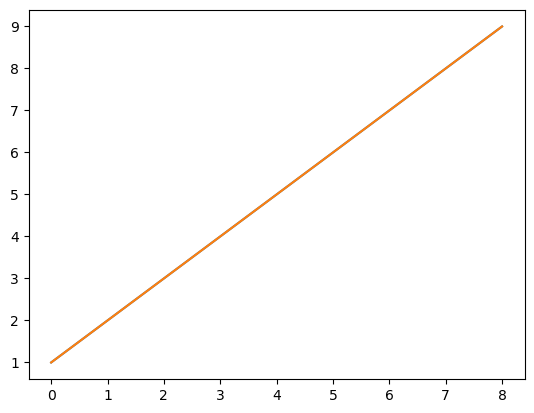

In [61]:
df['A'].plot()
plt.show()

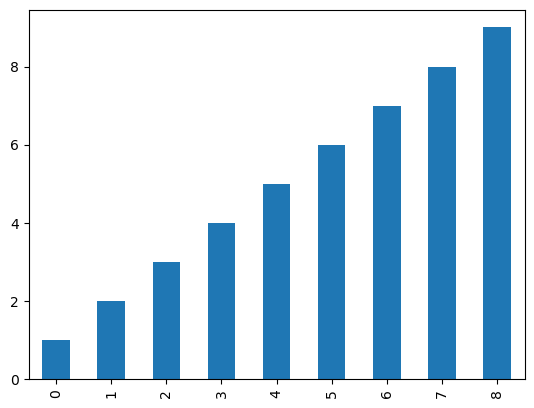

In [63]:
df['A'].plot(kind='bar')
plt.show()

Gambaran keseluruhan ini merangkumi konsep paling penting dalam Pandas, namun, perpustakaan ini sangat kaya, dan tiada had kepada apa yang anda boleh lakukan dengannya! Sekarang, mari kita gunakan pengetahuan ini untuk menyelesaikan masalah tertentu.



---

**Penafian**:  
Dokumen ini telah diterjemahkan menggunakan perkhidmatan terjemahan AI [Co-op Translator](https://github.com/Azure/co-op-translator). Walaupun kami berusaha untuk memastikan ketepatan, sila ambil maklum bahawa terjemahan automatik mungkin mengandungi kesilapan atau ketidaktepatan. Dokumen asal dalam bahasa asalnya harus dianggap sebagai sumber yang berwibawa. Untuk maklumat penting, terjemahan manusia profesional adalah disyorkan. Kami tidak bertanggungjawab atas sebarang salah faham atau salah tafsir yang timbul daripada penggunaan terjemahan ini.
